Training Model

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# filter Warnings
import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('final_dataset.csv')

In [12]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,...,RUL,Vibration (mm/s),Pressure (Pa),Maintenance Required,Temp_Change,Vib_Change,Temperature_Mean,Vibration_Mean,Pressure_Mean,RPM_Mean
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,...,4167.779109,0.033611,0.404079,1,-0.000021,-0.000016,0.239311,-0.399947,0.494977,0.613714
1,2,M14906,M,298.7,309.0,1843,25.8,130,0,No Failure,...,3888.111182,1.230485,0.441157,1,-1.124336,0.630469,-0.621904,0.198119,0.385376,-0.308169
2,3,L47227,L,298.8,309.1,1418,46.3,133,0,No Failure,...,2181.639753,1.213335,0.768289,0,-0.199003,-0.012131,-0.464246,-0.341381,0.622772,-0.216720
3,4,H29462,H,298.8,309.2,1425,53.9,135,0,No Failure,...,3819.147489,-0.593589,-0.722052,0,0.455568,-1.276486,0.129476,-0.829978,0.279540,-0.029202
4,5,M14909,M,298.9,309.2,1412,44.1,140,0,No Failure,...,801.375247,-1.457742,-0.116568,0,0.117924,-0.610483,-0.017933,-0.496937,0.440133,-0.187622


In [13]:
df.shape

(6903, 21)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6903 entries, 0 to 6902
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      6903 non-null   int64  
 1   Product ID               6903 non-null   object 
 2   Type                     6903 non-null   object 
 3   Air temperature [K]      6903 non-null   float64
 4   Process temperature [K]  6903 non-null   float64
 5   Rotational speed [rpm]   6903 non-null   int64  
 6   Torque [Nm]              6903 non-null   float64
 7   Tool wear [min]          6903 non-null   int64  
 8   Target                   6903 non-null   int64  
 9   Failure Type             6903 non-null   object 
 10  operational_hours        6903 non-null   int64  
 11  RUL                      6903 non-null   float64
 12  Vibration (mm/s)         6903 non-null   float64
 13  Pressure (Pa)            6903 non-null   float64
 14  Maintenance Required    

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,6903.0,3452.000000,1992.868786,1.000000,1726.500000,3452.000000,5177.500000,6903.000000
Air temperature [K],6903.0,300.652919,1.926195,295.300000,299.200000,300.800000,302.200000,304.500000
Process temperature [K],6903.0,310.193539,1.473016,305.700000,309.200000,310.300000,311.100000,313.800000
Rotational speed [rpm],6903.0,1541.055918,187.249405,1183.000000,1421.000000,1504.000000,1613.000000,2886.000000
Torque [Nm],6903.0,40.032913,10.226721,3.800000,33.100000,40.100000,46.900000,76.600000
Tool wear [min],6903.0,108.462263,64.398001,0.000000,53.000000,108.000000,164.000000,253.000000
Target,6903.0,0.047081,0.211827,0.000000,0.000000,0.000000,0.000000,1.000000
operational_hours,6903.0,2601.430537,1435.806621,111.000000,1320.500000,2545.000000,3917.000000,4995.000000
RUL,6903.0,2357.459043,1435.733497,-43.059499,1034.705461,2437.613362,3628.827145,4869.004338
Vibration (mm/s),6903.0,0.011324,0.994315,-1.732027,-0.853030,0.023697,0.871008,1.731966


In [16]:
df.describe(include= 'object')

,Product ID,Type,Failure Type
count,6903,6903,6903
unique,6903,3,6
top,M14860,L,No Failure
freq,1,4145,6568


In [17]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
operational_hours          0
RUL                        0
Vibration (mm/s)           0
Pressure (Pa)              0
Maintenance Required       0
Temp_Change                0
Vib_Change                 0
Temperature_Mean           0
Vibration_Mean             0
Pressure_Mean              0
RPM_Mean                   0
dtype: int64

In [18]:
df.duplicated().sum()

0

In [19]:
# Filtering Categorical Calumns
cat_cols= df.select_dtypes(include= 'O').columns.tolist()

In [20]:
# Print Categorical Columns
cat_cols

['Product ID', 'Type', 'Failure Type']

In [21]:
# value counts for categorical columns
for col in cat_cols:
    print(df[col].value_counts())

Product ID
M14860    1
L52537    1
L52535    1
L52534    1
L52533    1
         ..
L50224    1
L50223    1
L50222    1
L50221    1
L57154    1
Name: count, Length: 6903, dtype: int64
Type
L    4145
M    2089
H     669
Name: count, dtype: int64
Failure Type
No Failure                  6568
Heat Dissipation Failure     112
Power Failure                 92
Overstrain Failure            71
Tool Wear Failure             43
Random Failures               17
Name: count, dtype: int64


In [22]:
df_f = df[df.Target==1]
df_f['Failure Type'].value_counts()

Failure Type
Heat Dissipation Failure    112
Power Failure                92
Overstrain Failure           71
Tool Wear Failure            43
No Failure                    7
Name: count, dtype: int64

In [23]:
idx= df_f[df_f['Failure Type']== 'No Failure'].index
df.drop(idx, axis=0, inplace= True)

In [24]:
df_f = df[df.Target==0]
df_f['Failure Type'].value_counts()

Failure Type
No Failure         6561
Random Failures      17
Name: count, dtype: int64

In [25]:
idx= df_f[df_f['Failure Type']== 'Random Failures'].index
df.drop(idx, axis=0, inplace= True)

In [26]:
# Shape Check
df.shape

(6879, 21)

In [27]:
num_cols= df.select_dtypes(exclude='O').columns.tolist()
num_cols

['UDI',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Target',
 'operational_hours',
 'RUL',
 'Vibration (mm/s)',
 'Pressure (Pa)',
 'Maintenance Required',
 'Temp_Change',
 'Vib_Change',
 'Temperature_Mean',
 'Vibration_Mean',
 'Pressure_Mean',
 'RPM_Mean']

DATA VISUALISATION

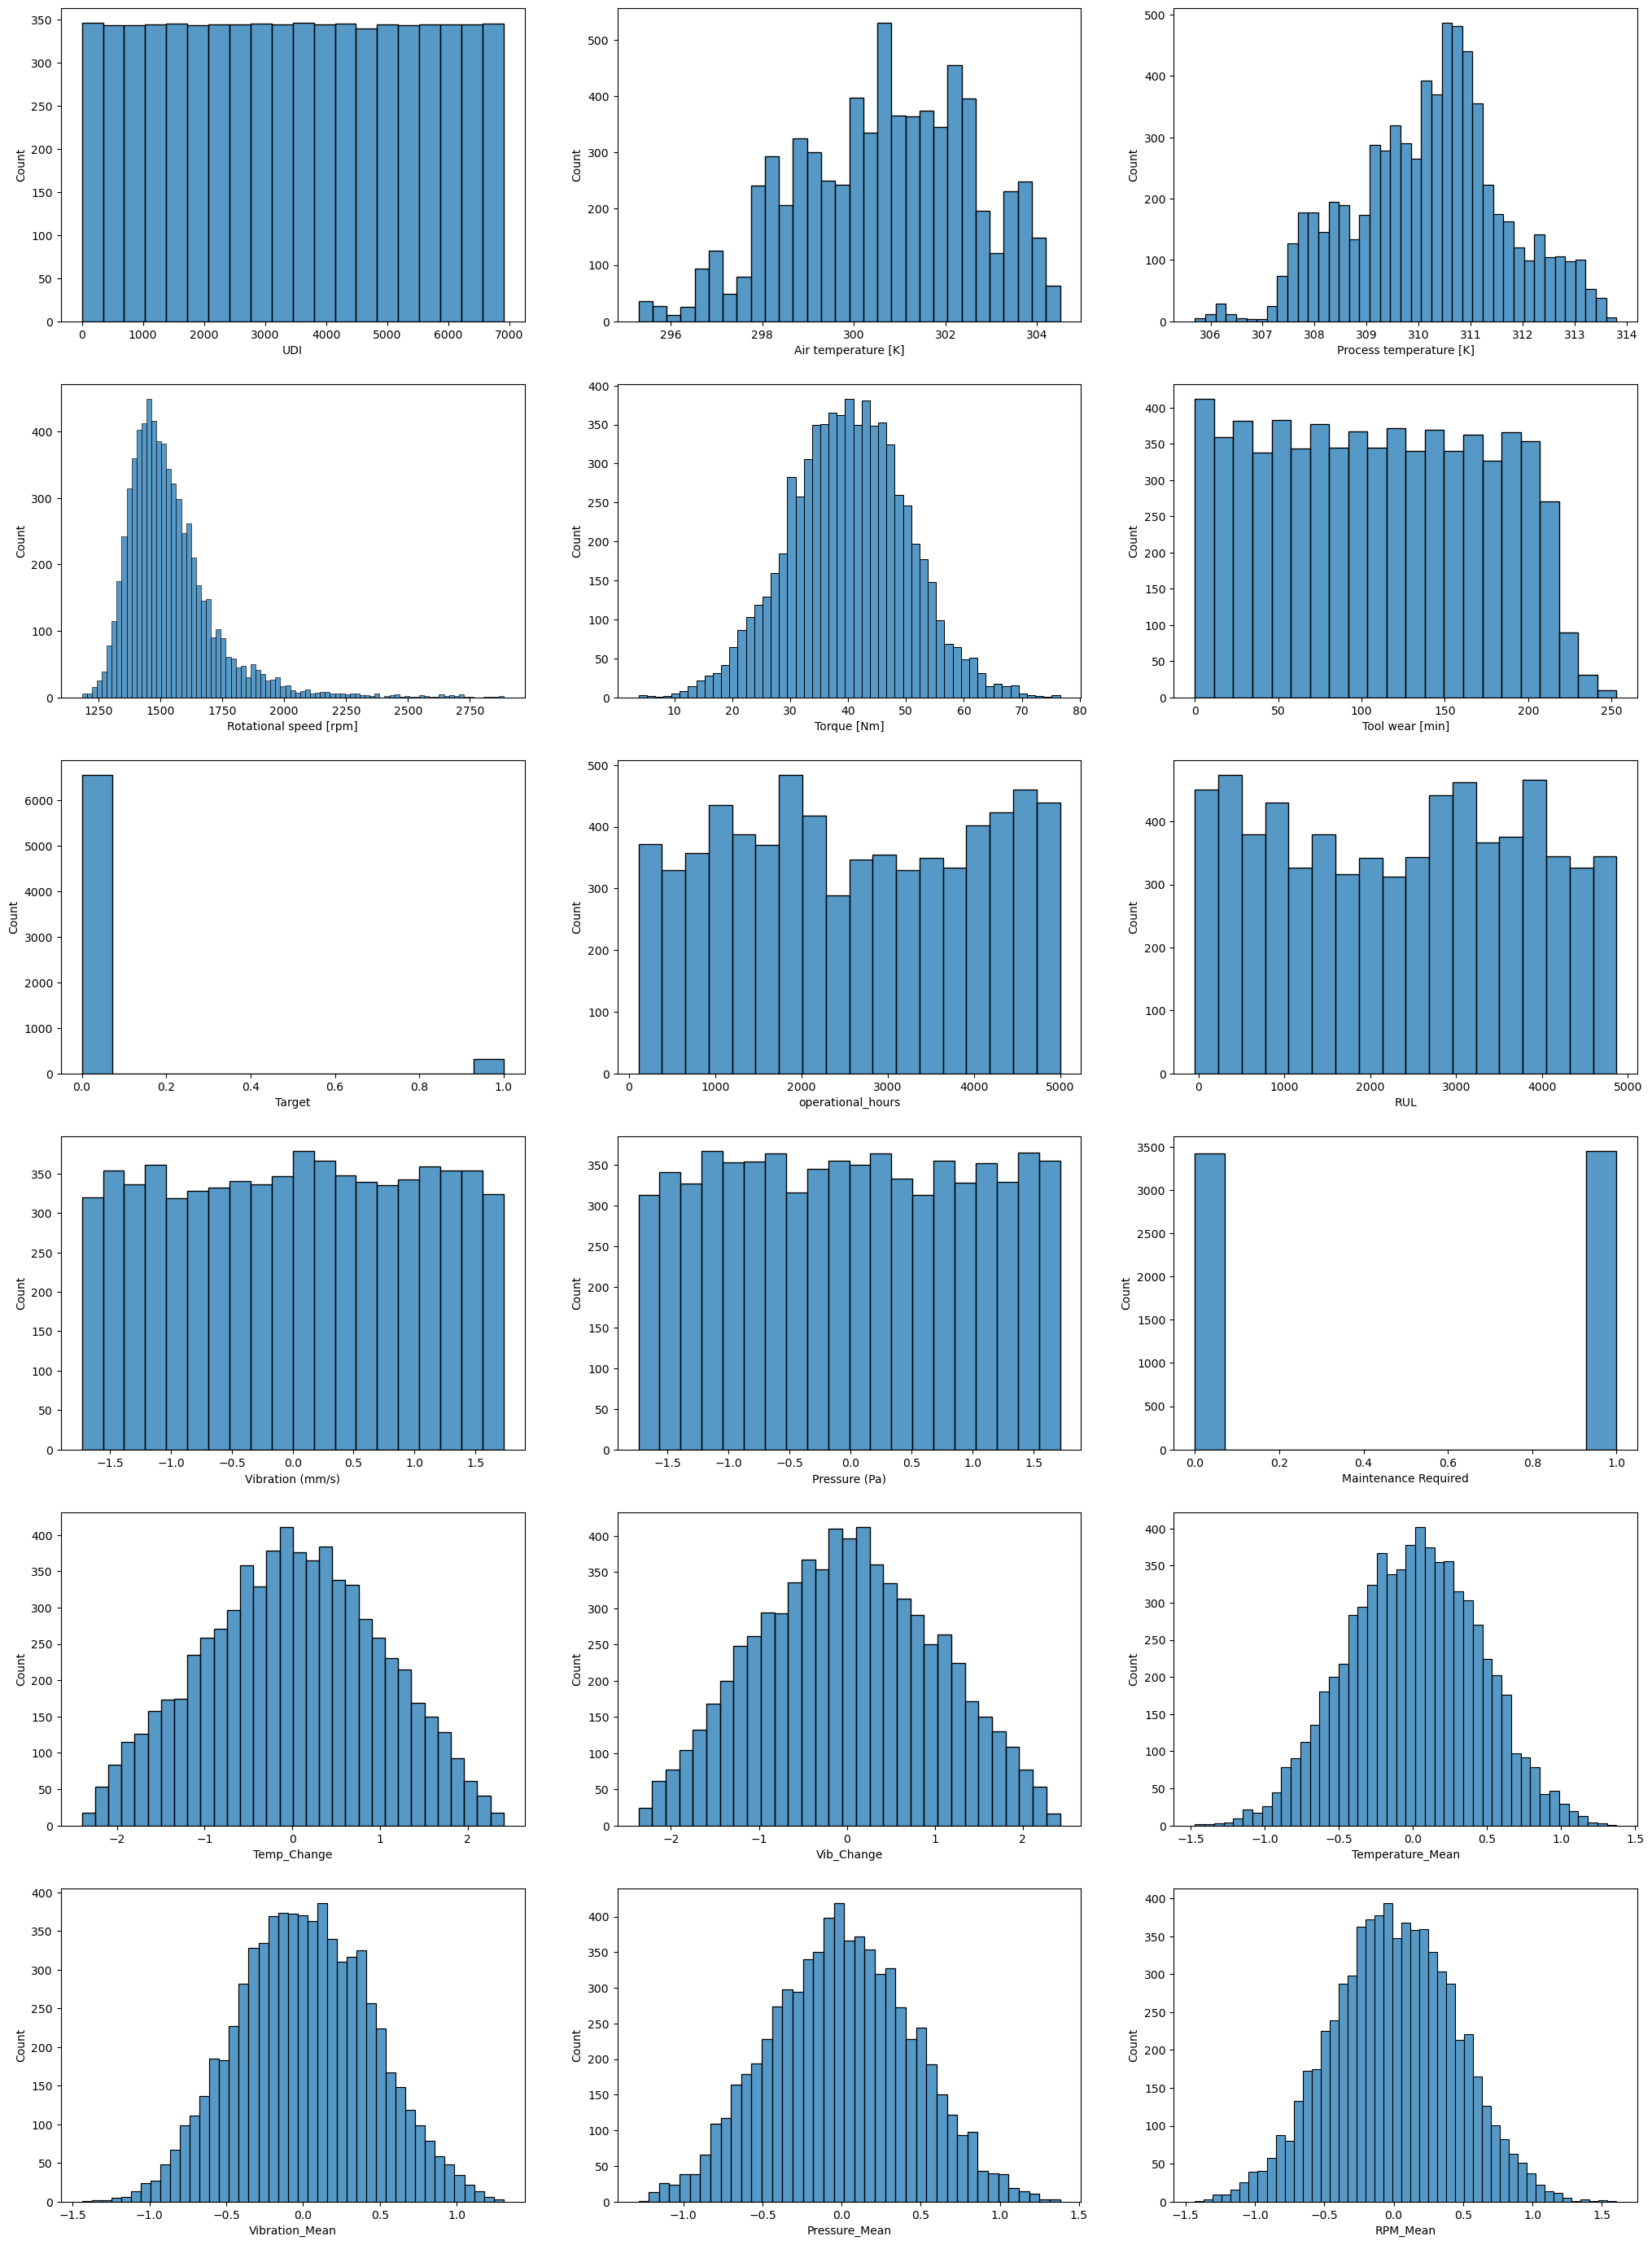

In [28]:
# Pair Plot
plt.figure(figsize= (25,35))

for i, col in  enumerate(num_cols, 1):
    plt.subplot(6,3,i)
    sns.histplot(data= df, x= col)
plt.show()

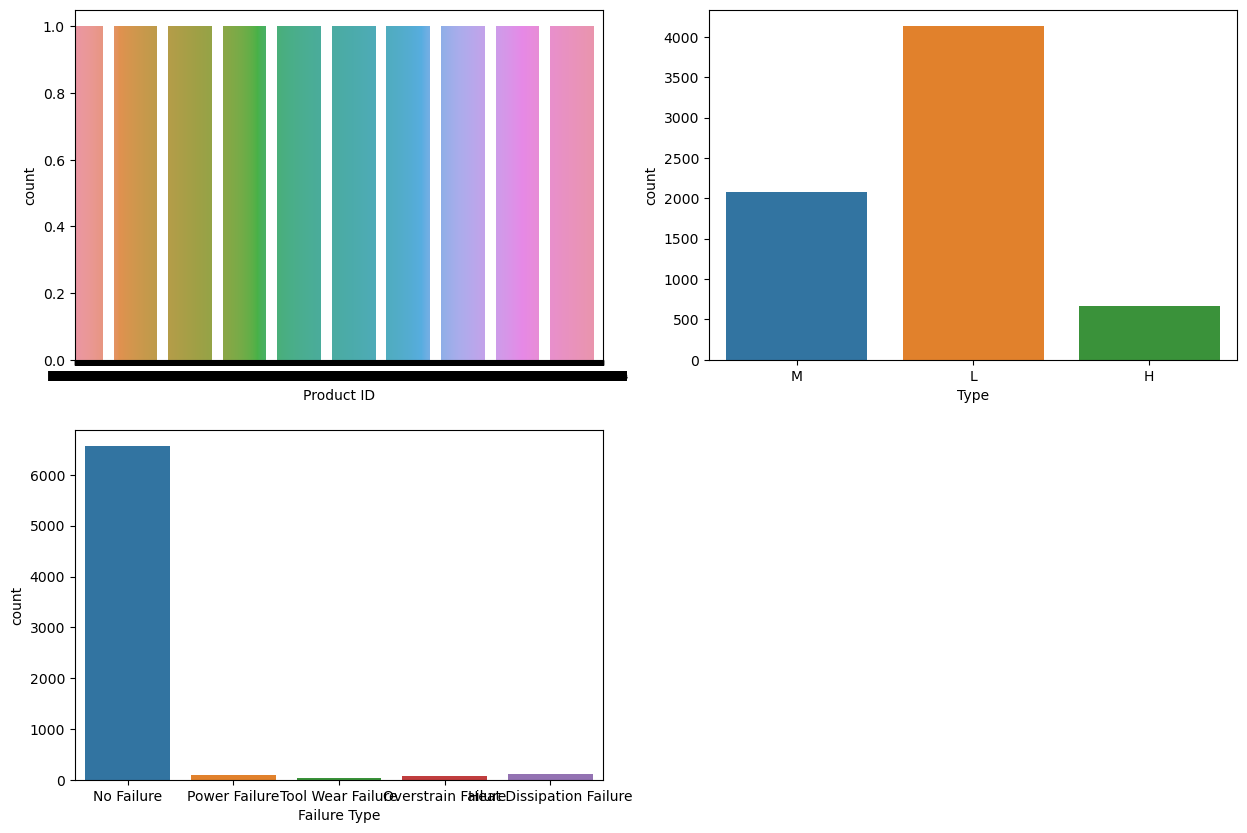

In [29]:
plt.figure(figsize= (15,10))

for i, col in  enumerate(cat_cols, 1):
    plt.subplot(2,2,i)
    sns.countplot(data= df, x= col)
plt.show()

TRAINING MODEL

In [30]:
# Preparing data for model Training

x= df.drop(['Target', 'Failure Type'], axis= 1)
y= df['Target']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# Splitting Data Into Train and test
X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [33]:
# Filtering the Categorical and Numerical Features for the Further Analysis and Operations
cat_cols= X_train.select_dtypes(include= "O").columns.tolist()
num_cols= X_train.select_dtypes(exclude= "O").columns.tolist()

In [34]:
cat_cols

['Product ID', 'Type']

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [36]:
# Column Transformation For the Numerical and categorical features
enc= OneHotEncoder(handle_unknown= 'ignore')
sc= StandardScaler()

ct= ColumnTransformer(
        [
            ('encoding', enc, cat_cols),
            ('scaling', sc, num_cols)
        ]
)

In [37]:
X_train= ct.fit_transform(X_train)
X_test = ct.transform(X_test)


Random Forest

In [38]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Load your dataset
df = pd.read_excel('dataset.xlsx')  # Replace with your dataset file path

# Define features and target variable
features = ['Air temperature [K]', 'Process temperature [K]',
            'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
            'Vibration (mm/s)', 'Pressure (Pa)']
X = df[features]
y = df['Target']  # Replace 'Target' with the actual target column name

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Example prediction on new data
new_data = pd.DataFrame({
    'Air temperature [K]': [305],
    'Process temperature [K]': [355],
    'Rotational speed [rpm]': [1550],
    'Torque [Nm]': [125],
    'Tool wear [min]': [35],
    'Vibration (mm/s)': [0.55],
    'Pressure (Pa)': [102000]
})

# Predict using the trained model
predicted_class = rf_classifier.predict(new_data)
print(f"Predicted Class: {predicted_class[0]}")

Accuracy: 0.98
Predicted Class: 1


In [39]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pickle

X = np.random.randn(1000, 6)
y = np.random.randint(0, 2, 1000)

model = RandomForestClassifier()
model.fit(X, y)

with open('model.pkl','wb') as model_file:
    pickle.dump(model, model_file)